# Uso de Análisis Topológico de Datos para la Optimización de Consumo de Combustibles, Exploracion e Insights (Visualizaciones)


***edenred_limpio*** y ***diesel_limpio*** tienen datos desde 2021 hasta 2024.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
edenred = pd.read_csv('edenred_limpio_v2.csv', dtype={2:str}, low_memory = False)
diesel = pd.read_csv('diesel_limpio_v2.csv')

In [8]:
edenred.head()

,year,month,id_region,cliente,division,bl,mercancia,recorrido,importe_transaccion,cantidad_mercancia,kg_c02,arboles,precio_unitario,rendimiento,rendimiento_real,kg_c02_por_recorrido,year_month
0,2023,1,1000,02125-031,DAI,IGWC,G SUPER,144,1120.282449,49.784626,120.528579,8.035239,22.502578,14.0,4.11,0.837004,2023_1
1,2023,1,1000,02125-031,DAI,IGWC,MAGNA,100,2263.692449,100.504626,243.321699,16.221447,22.523266,7.0,1.17,2.433217,2023_1
2,2023,1,1000,02125-031,DAI,IGWC,MAGNA,308,1921.882449,89.784626,217.368579,14.491239,21.405474,7.0,4.11,0.705742,2023_1
3,2023,1,1000,02125-031,DAI,IGWC,MAGNA,149,1921.882449,89.784626,217.368579,14.491239,21.405474,14.0,1.99,1.458850,2023_1
4,2023,1,1000,02125-031,DAI,IGWC,MAGNA,84,758.342449,34.614626,83.802009,5.586801,21.908151,7.0,4.24,0.997643,2023_1


In [13]:
# cambiar espacios por guiones bajos, convertir a minusculas y quitar acentos en todas las columnas
edenred.columns = edenred.columns.str.replace(' ', '_').str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
edenred.to_csv('edenred_limpio_v2.csv', index=False)

In [14]:
edenred = pd.read_csv('edenred_limpio_v2.csv', dtype={2: str}, low_memory=False)
edenred.head()

,year,month,id_region,cliente,division,bl,mercancia,recorrido,importe_transaccion,cantidad_mercancia,kg_c02,arboles,precio_unitario,rendimiento,rendimiento_real,kg_c02_por_recorrido,year_month
0,2023,1,1000,02125-031,DAI,IGWC,G SUPER,144,1120.282449,49.784626,120.528579,8.035239,22.502578,14.0,4.11,0.837004,2023_1
1,2023,1,1000,02125-031,DAI,IGWC,MAGNA,100,2263.692449,100.504626,243.321699,16.221447,22.523266,7.0,1.17,2.433217,2023_1
2,2023,1,1000,02125-031,DAI,IGWC,MAGNA,308,1921.882449,89.784626,217.368579,14.491239,21.405474,7.0,4.11,0.705742,2023_1
3,2023,1,1000,02125-031,DAI,IGWC,MAGNA,149,1921.882449,89.784626,217.368579,14.491239,21.405474,14.0,1.99,1.458850,2023_1
4,2023,1,1000,02125-031,DAI,IGWC,MAGNA,84,758.342449,34.614626,83.802009,5.586801,21.908151,7.0,4.24,0.997643,2023_1


In [35]:
diesel.head()

,fecha_de_servicio,precio_por_lt,costo_ieps,costo_total_+_ieps,cant_suministrada,zona,tipo_de_unidad,costo_total,costo_total_sin_ieps,km_recorrido,...,site,year,periodo,ieps_x_lt,q,status,lts_solicitados,folio_dors,destino/pozo,hora_requerida
0,2020-12-21,17.43,0.0,20916.00,1200.0,COMALCALCO,TOTE,21636.00,0.0,0.0,...,POZO,2021,ENERO,0.0,Q1,FINANCE,1200.0,DI23630,CIBIX 1001,08:00:00
1,2020-12-23,17.43,0.0,1080.66,62.0,MINATITLAN,UNIDAD DE REGISTRO,1117.86,0.0,0.0,...,POZO,2021,ENERO,0.0,Q1,FINANCE,600.0,DI23632,TUZANDEPENTL 205A,10:00:00
2,2020-12-23,17.43,0.0,11660.67,669.0,MINATITLAN,TRANSIT,12062.07,0.0,0.0,...,POZO,2021,ENERO,0.0,Q1,FINANCE,150.0,DI23632,TUZANDEPENTL 205A,10:00:00
3,2020-12-21,17.43,0.0,13909.14,798.0,COMALCALCO,SUPER BOMBA,14387.94,0.0,0.0,...,POZO,2021,ENERO,0.0,Q1,FINANCE,800.0,DI23645,BELLOTA 1A,09:00:00
4,2020-12-21,17.43,0.0,7843.50,450.0,COMALCALCO,TOTE,8113.50,0.0,0.0,...,POZO,2021,ENERO,0.0,Q1,FINANCE,1000.0,DI23645,BELLOTA 1A,09:00:00


In [10]:
print(f'Edenred tiene {edenred.shape[0]} filas y {edenred.shape[1]} columnas')
print(f'Diesel tiene {diesel.shape[0]} filas y {diesel.shape[1]} columnas')
print('')
#print columns
print(edenred.columns)
print(diesel.columns)

Edenred tiene 36941 filas y 17 columnas
Diesel tiene 24607 filas y 18 columnas

Index(['year', 'month', 'id_region', 'cliente', 'division', 'bl', 'mercancia',
       'recorrido', 'importe_transaccion', 'cantidad_mercancia', 'kg_c02',
       'arboles', 'precio_unitario', 'rendimiento', 'rendimiento_real',
       'kg_c02_por_recorrido', 'year_month'],
      dtype='object')
Index(['fecha_de_servicio', 'precio_por_lt', 'cant_suministrada', 'zona',
       'tipo_de_unidad', 'km_recorrido', 'location', 'proveedor', 'site',
       'year', 'periodo', 'q', 'status', 'lts_solicitados', 'folio_dors',
       'destino/pozo', 'hora_requerida', 'costo'],
      dtype='object')


In [11]:
print("Promedio de KGCO2 por km agrupado por tipo de combustible:")
print(edenred.groupby('mercancia')['kg_c02_por_recorrido'].mean().sort_values(ascending=True))

print("Promedio de precio unitario por tipo de combustible:")
print(edenred.groupby('mercancia')['precio_unitario'].mean().sort_values(ascending=True))

print("Promedio de rendimiento real por tipo de combustible:")
print(edenred.groupby('mercancia')['rendimiento_real'].mean().sort_values(ascending=False))

print("Promedio de cantidad de mercancia por tipo de combustible:")
print(edenred.groupby('mercancia')['cantidad_mercancia'].mean().sort_values(ascending=False))

Promedio de KGCO2 por km agrupado por tipo de combustible:
mercancia
MOBIL EXTRA          0.341705
GULF REGULAR         0.367190
SHELL SUPER          0.396292
REPSOL DIESEL        0.691323
REPSOL EFITEC 87     1.027113
BP DIESEL            1.177252
MAGNA                2.035523
BP REGULAR           2.130832
G SUPER              4.176725
G DIESEL             8.200128
DIESEL              11.144934
Name: kg_c02_por_recorrido, dtype: float64
Promedio de precio unitario por tipo de combustible:
mercancia
MOBIL EXTRA         20.147472
MAGNA               21.128342
GULF REGULAR        21.766650
G SUPER             22.066280
REPSOL EFITEC 87    22.177849
BP REGULAR          22.257353
DIESEL              23.058347
SHELL SUPER         23.228923
BP DIESEL           24.017860
G DIESEL            24.047871
REPSOL DIESEL       24.228060
Name: precio_unitario, dtype: float64
Promedio de rendimiento real por tipo de combustible:
mercancia
MOBIL EXTRA         7.467500
SHELL SUPER         7.356667
GULF 

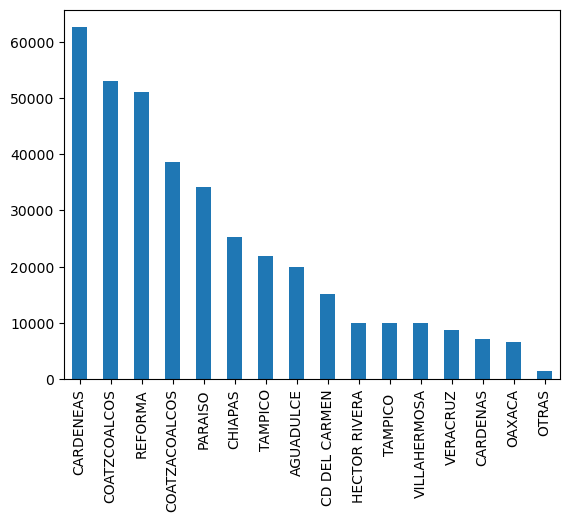

In [37]:
# agrupar por tipo de vehiculo y calcular promedio de cant_suministrada
zona_means = diesel.groupby('zona')['cant_suministrada'].mean().sort_values(ascending=False)
top_15 = zona_means.head(15)
others = pd.Series({'OTRAS': zona_means[15:].mean()})
combined = pd.concat([top_15, others])
combined.plot(kind='bar')
plt.show()

In [45]:
diesel['zona'].unique()

array(['COMALCALCO', 'MINATITLAN', 'AGUA DULCE', 'VERACRUZ', 'CARDENAS',
       'CENTLA', 'REYNOSA', 'POZA RICA', 'PARAISO', 'CD DEL CARMEN',
       'CHIAPAS', 'TAMPICO ', 'CENTRO', 'NACAJUCA', 'HUIMANGUILLO',
       'MACUSPANA', 'COATZACOALCOS', 'AGUADULCE', 'TAMPICO',
       'CD D EL CARMEN', 'COATZCOALCOS', 'CARDENEAS', 'HECTOR RIVERA',
       'OAXACA', 'JALPA DE MENDEZ', 'CIUDAD DEL CARMEN', 'CENLTA',
       'REFORMA', 'VILLAHERMOSA', 'CUNDUACAN'], dtype=object)

In [48]:
# ajustar nombres de zonas para que sean consistentes
zone_mapping = {
    'CARDENEAS': 'CARDENAS',
    'COATZCOALCOS': 'COATZACOALCOS', 
    'CD D EL CARMEN': 'CIUDAD DEL CARMEN',
    'CD DEL CARMEN': 'CIUDAD DEL CARMEN',
    'CENLTA': 'CENTLA',
    'AGUADULCE': 'AGUA DULCE'
}

# usar fillna para mantener los valores originales que no estan en el mapping
diesel['zona'] = diesel['zona'].map(zone_mapping).fillna(diesel['zona'])
diesel['zona'].unique()

array(['COMALCALCO', 'MINATITLAN', 'AGUA DULCE', 'VERACRUZ', 'CARDENAS',
       'CENTLA', 'REYNOSA', 'POZA RICA', 'PARAISO', 'CIUDAD DEL CARMEN',
       'CHIAPAS', 'TAMPICO ', 'CENTRO', 'NACAJUCA', 'HUIMANGUILLO',
       'MACUSPANA', 'COATZACOALCOS', 'TAMPICO', 'HECTOR RIVERA', 'OAXACA',
       'JALPA DE MENDEZ', 'REFORMA', 'VILLAHERMOSA', 'CUNDUACAN'],
      dtype=object)

In [53]:
diesel.to_csv('diesel_limpio_v2.csv', index=False)
diesel = pd.read_csv('diesel_limpio_v2.csv')
diesel.head()

,fecha_de_servicio,precio_por_lt,cant_suministrada,zona,tipo_de_unidad,km_recorrido,location,proveedor,site,year,periodo,q,status,lts_solicitados,folio_dors,destino/pozo,hora_requerida,costo
0,2020-12-21,17.43,1200.0,COMALCALCO,TOTE,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,1200.0,DI23630,CIBIX 1001,08:00:00,20916.00
1,2020-12-23,17.43,62.0,MINATITLAN,UNIDAD DE REGISTRO,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,600.0,DI23632,TUZANDEPENTL 205A,10:00:00,1080.66
2,2020-12-23,17.43,669.0,MINATITLAN,TRANSIT,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,150.0,DI23632,TUZANDEPENTL 205A,10:00:00,11660.67
3,2020-12-21,17.43,798.0,COMALCALCO,SUPER BOMBA,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,800.0,DI23645,BELLOTA 1A,09:00:00,13909.14
4,2020-12-21,17.43,450.0,COMALCALCO,TOTE,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,1000.0,DI23645,BELLOTA 1A,09:00:00,7843.50


In [54]:
diesel['zona'].unique()

array(['COMALCALCO', 'MINATITLAN', 'AGUA DULCE', 'VERACRUZ', 'CARDENAS',
       'CENTLA', 'REYNOSA', 'POZA RICA', 'PARAISO', 'CIUDAD DEL CARMEN',
       'CHIAPAS', 'TAMPICO ', 'CENTRO', 'NACAJUCA', 'HUIMANGUILLO',
       'MACUSPANA', 'COATZACOALCOS', 'TAMPICO', 'HECTOR RIVERA', 'OAXACA',
       'JALPA DE MENDEZ', 'REFORMA', 'VILLAHERMOSA', 'CUNDUACAN'],
      dtype=object)

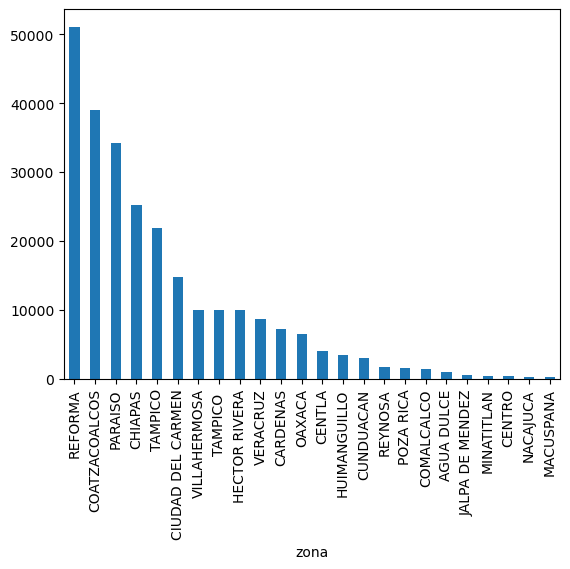

In [50]:
diesel.groupby('zona')['cant_suministrada'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [52]:
diesel.groupby('zona')['cant_suministrada'].mean().sort_values(ascending=False).head(10)

zona
REFORMA              51105.500000
COATZACOALCOS        39024.406250
PARAISO              34229.202421
CHIAPAS              25283.353909
TAMPICO              21958.444444
CIUDAD DEL CARMEN    14797.878205
VILLAHERMOSA         10000.000000
TAMPICO              10000.000000
HECTOR RIVERA        10000.000000
VERACRUZ              8731.751515
Name: cant_suministrada, dtype: float64

In [57]:
diesel.columns

Index(['fecha_de_servicio', 'precio_por_lt', 'cant_suministrada', 'zona',
       'tipo_de_unidad', 'km_recorrido', 'location', 'proveedor', 'site',
       'year', 'periodo', 'q', 'status', 'lts_solicitados', 'folio_dors',
       'destino/pozo', 'hora_requerida', 'costo'],
      dtype='object')

In [105]:
diesel.columns

Index(['fecha_de_servicio', 'precio_por_lt', 'costo_ieps',
       'costo_total_+_ieps', 'cant_suministrada', 'zona', 'tipo_de_unidad',
       'costo_total', 'costo_total_sin_ieps', 'km_recorrido', 'location',
       'proveedor', 'site', 'year', 'periodo', 'ieps_x_lt', 'q', 'status',
       'lts_solicitados', 'folio_dors', 'destino/pozo', 'hora_requerida',
       'COSTO_NUEVA'],
      dtype='object')

In [58]:
diesel.head()

,fecha_de_servicio,precio_por_lt,cant_suministrada,zona,tipo_de_unidad,km_recorrido,location,proveedor,site,year,periodo,q,status,lts_solicitados,folio_dors,destino/pozo,hora_requerida,costo
0,2020-12-21,17.43,1200.0,COMALCALCO,TOTE,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,1200.0,DI23630,CIBIX 1001,08:00:00,20916.00
1,2020-12-23,17.43,62.0,MINATITLAN,UNIDAD DE REGISTRO,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,600.0,DI23632,TUZANDEPENTL 205A,10:00:00,1080.66
2,2020-12-23,17.43,669.0,MINATITLAN,TRANSIT,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,150.0,DI23632,TUZANDEPENTL 205A,10:00:00,11660.67
3,2020-12-21,17.43,798.0,COMALCALCO,SUPER BOMBA,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,800.0,DI23645,BELLOTA 1A,09:00:00,13909.14
4,2020-12-21,17.43,450.0,COMALCALCO,TOTE,0.0,MXS,TAGAL,POZO,2021,ENERO,Q1,FINANCE,1000.0,DI23645,BELLOTA 1A,09:00:00,7843.50


In [59]:
#agrupar por tipo_de_unidad y calcular promedio de costo
diesel.groupby('tipo_de_unidad')['costo'].mean().sort_values(ascending=False)

tipo_de_unidad
TANQUE ESTACIONARIO     680233.312601
GENERADOR                43069.629417
TOTE                     22739.566372
BOMBA MARINA             19394.151930
BOMBA TRIPLEX            19348.350000
                            ...      
MOTOR DEUTZ               1190.604552
TORRE DE ILUMINACION      1055.586589
BIDON                      419.750768
TF                           0.000000
QUINTA CON HIAB              0.000000
Name: costo, Length: 91, dtype: float64